# WALMART SALES ANALYSIS & FORECASTING.


#### *PROJECT DESCRIPTION*
This project applies advanced time-series and machine learning techniques to Walmart’s weekly sales dataset to explore temporal trends, detect sales anomalies, and model the influence of macroeconomic factors. The goal is to generate accurate short-term forecasts and actionable insights that enhance business intelligence and strategic planning capabilities.

### PROJECT OVERVIEW

* ##### Data Cleaning & Feature Engineering

Checked for missing values, duplicates, and outliers and created meaningful features.

* ##### Exploratory Data Analysis (EDA)

Examined sales patterns, store performance, and the impact of holidays and economic factors.

Generated business-driven visualizations to highlight insights relevant to inventory, promotions, and operational strategy.

* ##### Machine Learning Analysis

Applied Random Forest regression to assess feature importance, identifying the key drivers of sales.

Focused on explanatory analysis rather than direct prediction, providing actionable insights for business planning.

* ##### Time-Series Forecasting

Built ARIMA and SARIMA/SARIMAX models to forecast weekly sales.

Incorporated exogenous variables (Temperature, Fuel_Price, CPI, Unemployment, Holiday_Flag) for more accurate predictions.

* ##### Tools & Techniques:

Programming & Analysis: Python (Pandas, NumPy, Scikit-learn)

Visualization: Matplotlib, Seaborn

Forecasting: Statsmodels (ARIMA, SARIMA, SARIMAX)

Machine Learning: Random Forest Regressor

Environment: Jupyter Notebook / VS Code


#### DATA OVERVIEW  

| Attribute     | Description |
| :--- | :--- |
|----------------|-------------|
| **Dataset**    | Walmart Weekly Sales |
| **Source**     | [Kaggle – Walmart Sales Data](https://www.kaggle.com/datasets/mikhail1681/walmart-sales?select=Walmart_Sales.csv) |
| **Timeframe**  | 2010 – 2012 (Weekly data) |
| **Shape**      | (6,435 rows × 8 columns) |


 ######  DATA DICTIONARY

| Column Name | Type | Description |
| :--- | :--- | :--- |
| Store | Int | Unique store identifier |
| Weekly_Sales | Float | Total sales for the week |
| Holiday_Flag | Int | Indicates whether the week contained a major holiday (1 = Yes, 0 = No) |
| Temperature | Float | Average temperature during the week |
| Fuel_Price | Float | Average fuel cost per gallon |
| CPI | Float | Price Index |
| Unemployment | Float | Unemployment rate for the corresponding region |

In [5]:

# Core libraries for data manipulation
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Forecasting & Time Series Analysis
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# System Warnings
import warnings
warnings.filterwarnings("ignore")

print(" All necessary Libraries imported successfully!")



 All necessary Libraries imported successfully!


In [6]:
#Load the dataset
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Walmart Sales Project\Dataset\Walmart_Sales.csv")

print(" Dataset loaded successfully!")

 Dataset loaded successfully!


In [7]:
#Quick Inspection of the data
print("Shape:", data.shape)
print("\nColumns:", list(data.columns))
print("\nData types:")
print(data.dtypes)

Shape: (6435, 8)

Columns: ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

Data types:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [8]:
# Ensuring the Date column is properly parsed (day first)
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')

# Set as index
data.set_index('Date', inplace=True)

# Preview the first 10 Rows of Dataset 
data.head(10)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
2010-03-12,1,1439541.59,0,57.79,2.667,211.380643,8.106
2010-03-19,1,1472515.79,0,54.58,2.720,211.215635,8.106
2010-03-26,1,1404429.92,0,51.45,2.732,211.018042,8.106
2010-04-02,1,1594968.28,0,62.27,2.719,210.820450,7.808


In [9]:

# Basic Info and Summary
print("Basic Information:\n")
print(data.info())

print("\nSummary Statistics:\n")
display(data.describe())

Basic Information:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB
None

Summary Statistics:



,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## DATA CLEANING & PREPROCESSING

Checking for null values

In [10]:
# Check for Missing Values
print("Checking for Missing Values:\n")
print(data.isnull().sum())

Checking for Missing Values:

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


Checking for duplicates

In [11]:
# Check for Duplicates
duplicates = data.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

Number of Duplicate Rows: 0


Checking for outliers in data

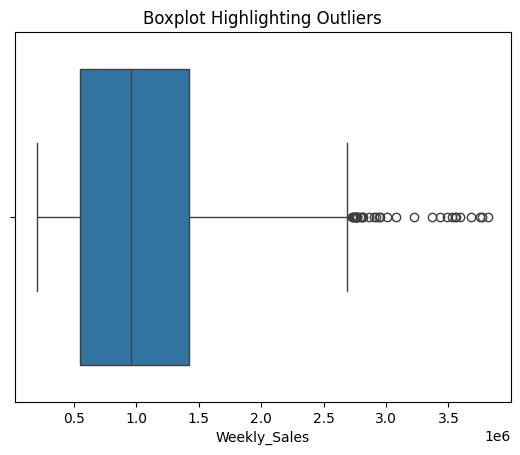

In [12]:
# Visualization of outliers in Weekly Sales
sns.boxplot(x=data['Weekly_Sales'])
plt.title("Boxplot Highlighting Outliers")
plt.show()

In [13]:
# Checking the Index (Date) Range and Frequency
print("Date Range and Frequency:")
print("Start Date:", data.index.min())
print("End Date:", data.index.max())
print("Total Unique Dates:", data.index.nunique())


Date Range and Frequency:
Start Date: 2010-02-05 00:00:00
End Date: 2012-10-26 00:00:00
Total Unique Dates: 143


In [14]:
# Ensuring Columns are Properly Named (consistent casing)
data.columns = data.columns.str.strip().str.title()

## EXPLORATORY DATA ANALYSIS (EDA)

  What are the overall sales trends across time?


* Total and Average Weekly Sales

In [17]:
# Total weekly sales across all stores
total_weekly_sales = data['Weekly_Sales'].sum()
print(f"Total Weekly Sales: ${total_weekly_sales:,.2f}")

# Average weekly sales across all weeks
average_weekly_sales = data['Weekly_Sales'].mean()
print(f"Average Weekly Sales: ${average_weekly_sales:,.2f}")



Total Weekly Sales: $6,737,218,987.11
Average Weekly Sales: $1,046,964.88


* Total Weekly sales trend over time(All stores)

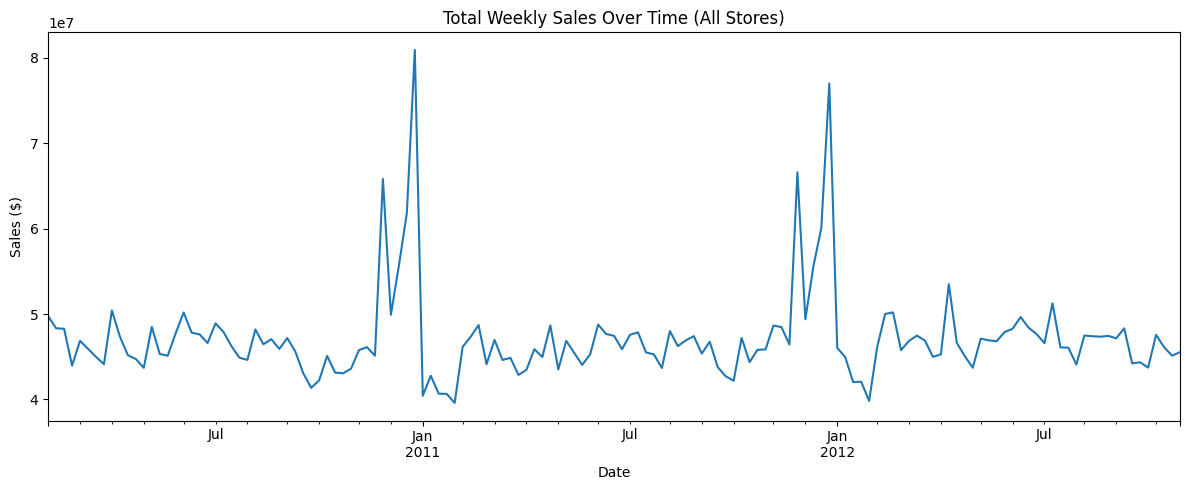

In [18]:
# Visualizing Total Weekly Sales Over Time
plt.figure(figsize=(12,5))
data['Weekly_Sales'].resample('W').sum().plot()
plt.title("Total Weekly Sales Over Time (All Stores)")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.tight_layout()
plt.show()

* Average Monthly Sales Trend over Time

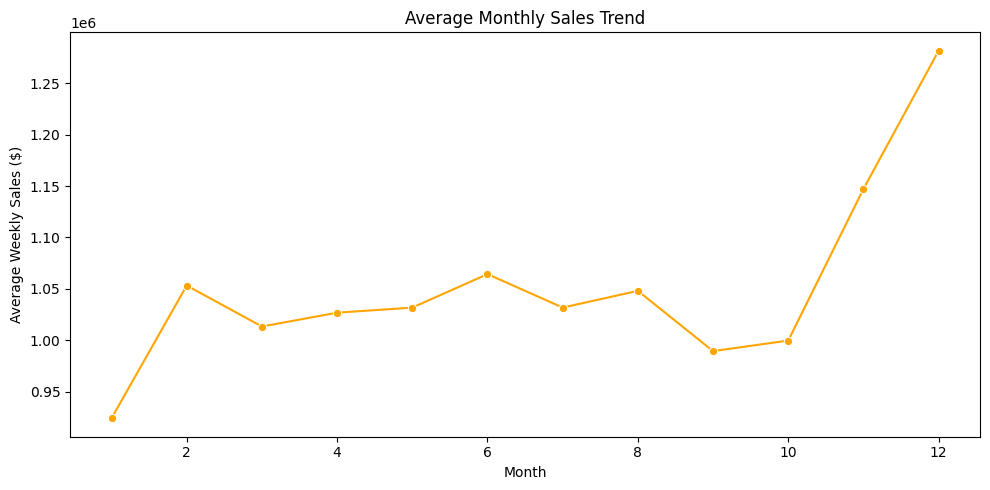

In [19]:
# Monthly Sales Trend Analysis
data['Month'] = data.index.month
monthly_sales = data.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='orange')
plt.title("Average Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales ($)")
plt.tight_layout()
plt.show()

* Average Monthly Sales trend over  years


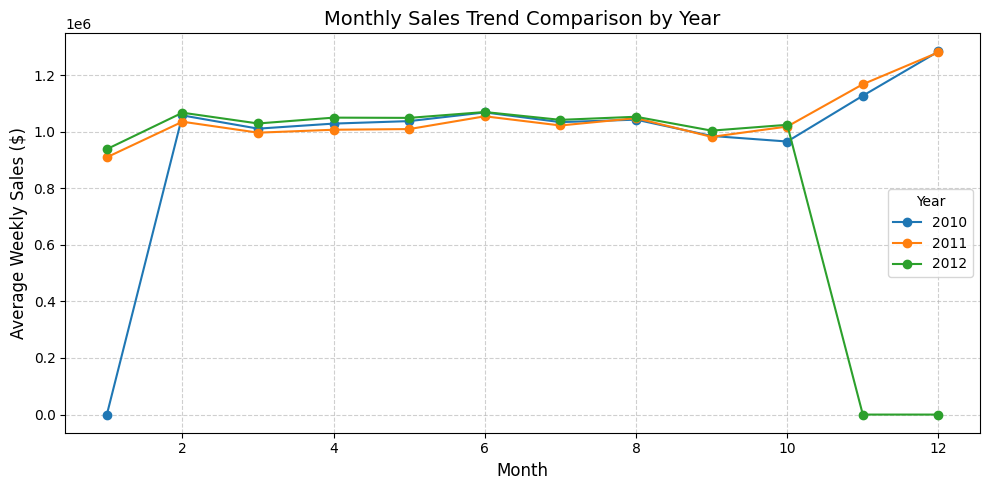

In [20]:
# Ensuring the index is datetime
data.index = pd.to_datetime(data.index)

# Extract year and month from index
data['Year'] = data.index.year
data['Month'] = data.index.month

# Group by Year and Month to get monthly average sales
monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()

# Pivot for easier plotting
pivot_sales = monthly_sales.pivot(index='Month', columns='Year', values='Weekly_Sales').fillna(0)

# Plot
plt.figure(figsize=(10, 5))
for year in pivot_sales.columns:
    plt.plot(pivot_sales.index, pivot_sales[year], marker='o', label=f"{year}")

plt.title("Monthly Sales Trend Comparison by Year", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Weekly Sales ($)", fontsize=12)
plt.legend(title="Year")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* Which stores contribute the most revenue?

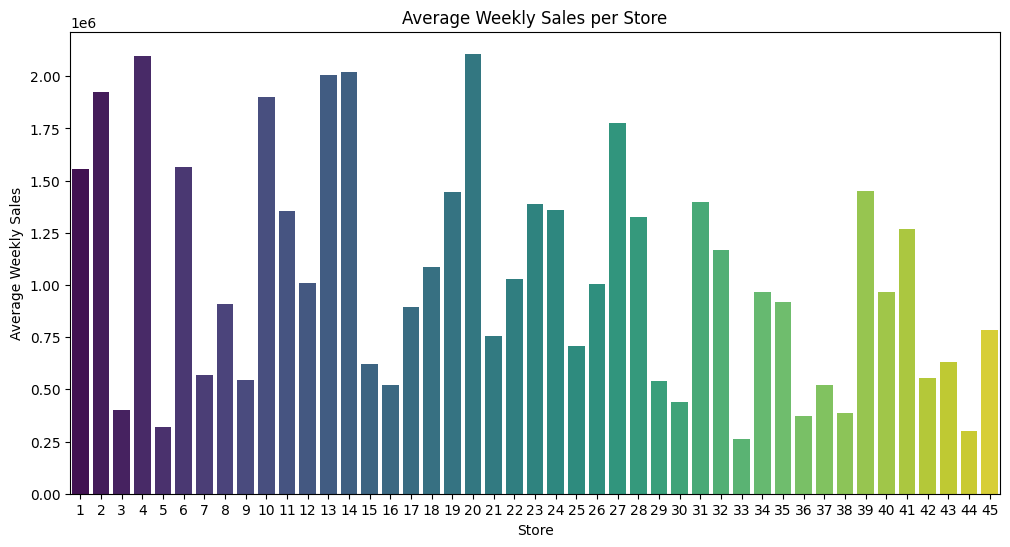

Store 20 has the highest average weekly sales: $2,107,676.87


In [24]:
# Summarize store-level performance
store_summary = data.groupby('Store')['Weekly_Sales'].agg(
    Total_Sales='sum',
    Average_Sales='mean',
    Sales_Volatility='std'
).sort_values(by='Total_Sales', ascending=False)

# Plot average sales per store
plt.figure(figsize=(12,6))
sns.barplot(x=store_summary.index, y=store_summary['Average_Sales'], palette='viridis')
plt.title('Average Weekly Sales per Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks()
plt.show()

# Identify top-performing store
top_store = store_summary['Average_Sales'].idxmax()
top_sales_value = store_summary.loc[top_store, 'Average_Sales']

print(f"Store {top_store} has the highest average weekly sales: ${top_sales_value:,.2f}")

* Top 5 performing stores

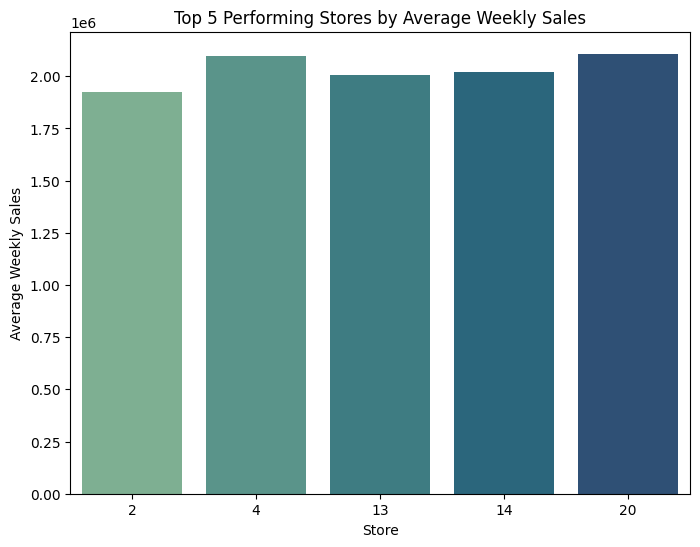

Top 5 Performing Stores by Average Weekly Sales:

Store 20: $2,107,676.87
Store 4: $2,094,712.96
Store 14: $2,020,978.40
Store 13: $2,003,620.31
Store 2: $1,925,751.34

Store 20 has the highest average weekly sales: $2,107,676.87


In [25]:
# Summarize key store performance metrics
store_summary = data.groupby('Store')['Weekly_Sales'].agg(
    Total_Sales='sum',
    Average_Sales='mean',
    Sales_Volatility='std'
).sort_values(by='Average_Sales', ascending=False)

# Select the Top 5 performing stores
top5_stores = store_summary.head(5)

# --- Visualization ---
plt.figure(figsize=(8,6))
sns.barplot(
    x=top5_stores.index, 
    y=top5_stores['Average_Sales'], 
    palette='crest'
)
plt.title('Top 5 Performing Stores by Average Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

# --- Print summary insights ---
print("Top 5 Performing Stores by Average Weekly Sales:\n")
for store, avg_sale in zip(top5_stores.index, top5_stores['Average_Sales']):
    print(f"Store {store}: ${avg_sale:,.2f}")

top_store = top5_stores['Average_Sales'].idxmax()
print(f"\nStore {top_store} has the highest average weekly sales: "
      f"${top5_stores.loc[top_store, 'Average_Sales']:,.2f}")


* Non-performing Stores

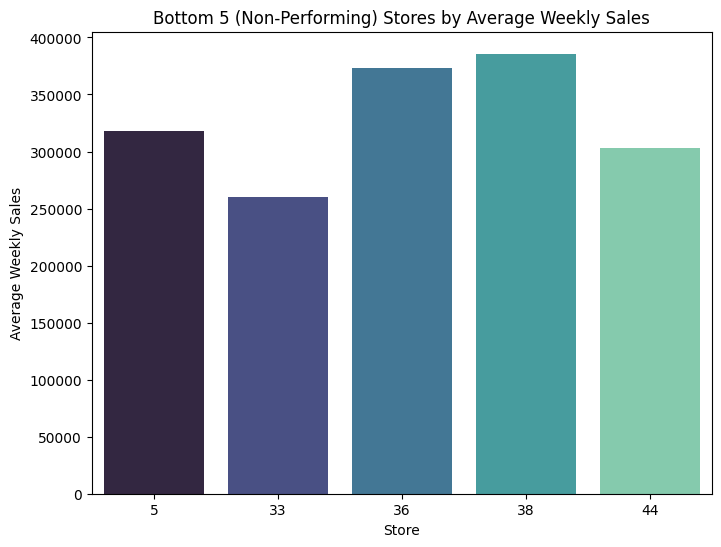

Bottom 5 (Non-Performing) Stores by Average Weekly Sales:

Store 38: $385,731.65
Store 36: $373,511.99
Store 5: $318,011.81
Store 44: $302,748.87
Store 33: $259,861.69

Store 33 has the lowest average weekly sales: $259,861.69


In [26]:
# Summarize key store performance metrics
store_summary = data.groupby('Store')['Weekly_Sales'].agg(
    Total_Sales='sum',
    Average_Sales='mean',
    Sales_Volatility='std'
).sort_values(by='Average_Sales', ascending=False)

# Select the Bottom 5 (non-performing) stores
Bottom5_stores = store_summary.tail(5)

# --- Visualization ---
plt.figure(figsize=(8,6))
sns.barplot(
    x=Bottom5_stores.index, 
    y=Bottom5_stores['Average_Sales'], 
    palette='mako'
)
plt.title('Bottom 5 (Non-Performing) Stores by Average Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

# --- Print summary insights ---
print("Bottom 5 (Non-Performing) Stores by Average Weekly Sales:\n")
for store, avg_sale in zip(Bottom5_stores.index, Bottom5_stores['Average_Sales']):
    print(f"Store {store}: ${avg_sale:,.2f}")

Bottom_store = Bottom5_stores['Average_Sales'].idxmin()
print(f"\nStore {Bottom_store} has the lowest average weekly sales: "
      f"${Bottom5_stores.loc[Bottom_store, 'Average_Sales']:,.2f}")

Holiday vs Non-Holiday Sales 

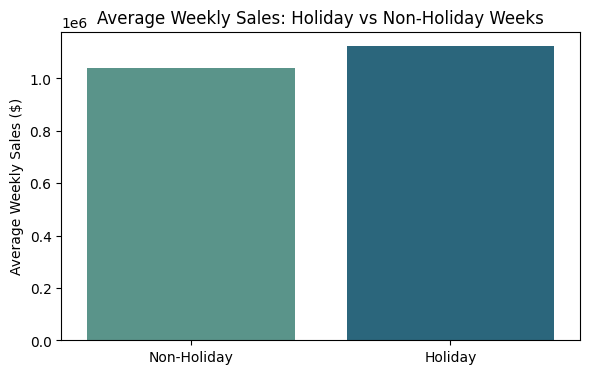

Holiday Weeks Avg Sales: $1,122,887.89
Non-Holiday Weeks Avg Sales: $1,041,256.38


In [27]:
# Compute average sales per group for visualization
avg_sales = data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=['Non-Holiday', 'Holiday'], y=avg_sales.values, palette='crest')
plt.title("Average Weekly Sales: Holiday vs Non-Holiday Weeks")
plt.ylabel("Average Weekly Sales ($)")
plt.tight_layout()
plt.show()

print(f"Holiday Weeks Avg Sales: ${avg_sales[1]:,.2f}")
print(f"Non-Holiday Weeks Avg Sales: ${avg_sales[0]:,.2f}")

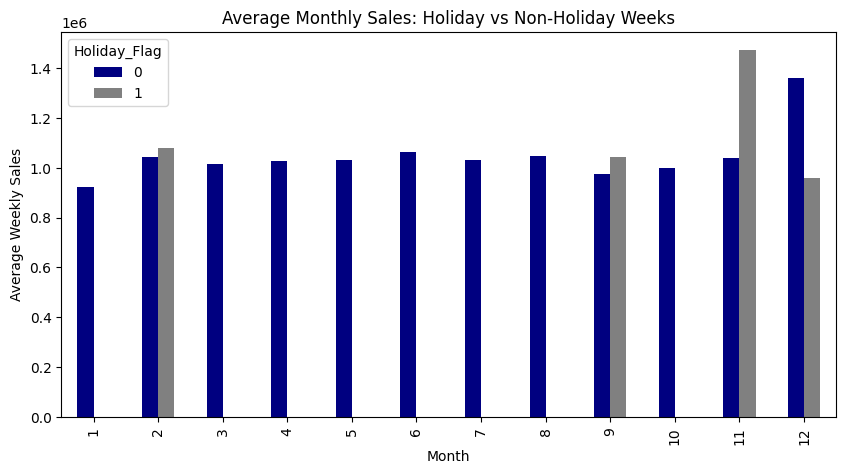

In [28]:
# Extract month from index since 'Date' is the index
data['Month'] = data.index.month

# Group and visualize
holiday_by_month = data.groupby(['Month', 'Holiday_Flag'])['Weekly_Sales'].mean().unstack()

# Plot
holiday_by_month.plot(kind='bar', figsize=(10,5), color=['navy', 'gray'])
plt.title('Average Monthly Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()


* Holiday Sales trend over time

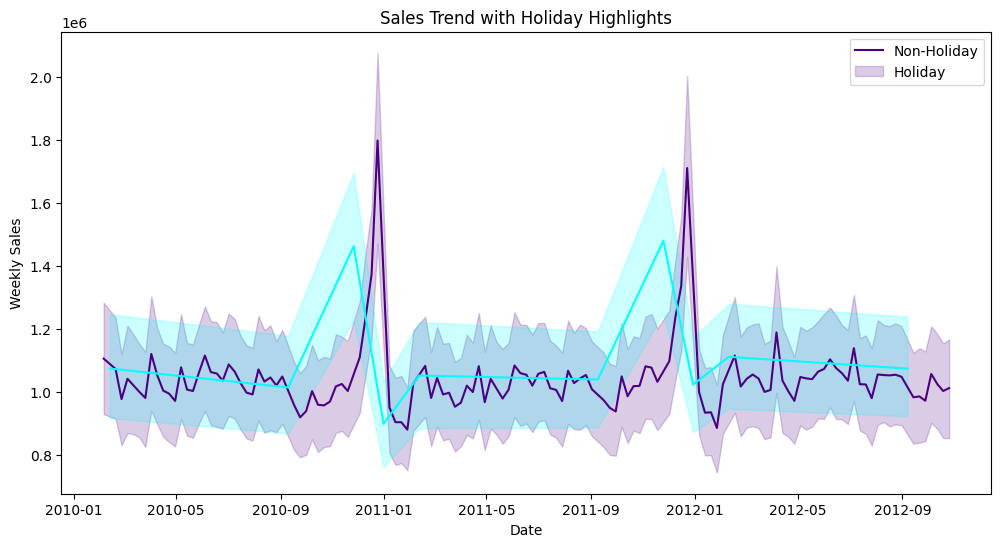

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Weekly_Sales', hue='Holiday_Flag', data=data, palette=['indigo', 'cyan'])
plt.title('Sales Trend with Holiday Highlights')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend(['Non-Holiday', 'Holiday'])
plt.show()

#### Statistical Analysis & Descriptive Statistics

In [63]:
from scipy.stats import ttest_ind

# Descriptive statistics

print("Descriptive Statistics for Numeric Columns:\n")
print(data.describe())

# T-Test: Holiday vs Non-Holiday Sales

# Separate the two groups
holiday_sales = data[data['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = data[data['Holiday_Flag'] == 0]['Weekly_Sales']

# Run Welch’s t-test (doesn't assume equal variance)
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

print("T-Test: Holiday vs Non-Holiday Sales\n" + "-"*45)
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4e}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Significant difference in average sales between holiday and non-holiday weeks.")
else:
    print("No statistically significant difference in sales between holiday and non-holiday weeks.")

# Correlations with economic indicators

corr_cols = ['Weekly_Sales','Cpi','Fuel_Price','Unemployment']
correlations = data[corr_cols].corr()
print("\nCorrelation Matrix:")
print(correlations.round(3))   


Descriptive Statistics for Numeric Columns:

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               Cpi  Unemployment        Month         Year  
count  6435.000000   6435.000000  6435.000000  6435.000000  
mean    171.578394      7.999151     6.447552  2010.965035  
std      39.356712      1.875885     3.238308     0.797019  
min     126.064000      3.

##### Sales vs Economic Factors

How do macroeconomic conditions influence sales?

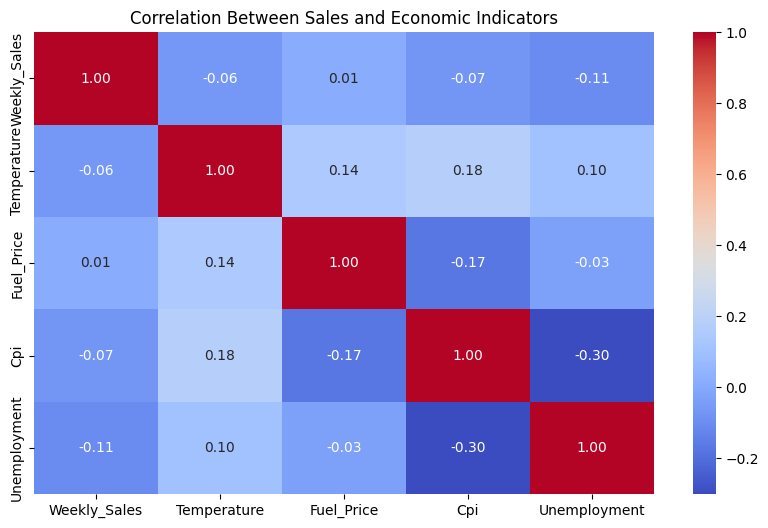

In [34]:
# Sales Correlation with Temperature, Fuel, CPI, Unemployment

plt.figure(figsize=(10,6))
sns.heatmap(data[['Weekly_Sales','Temperature','Fuel_Price','Cpi','Unemployment']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Sales and Economic Indicators")
plt.show()

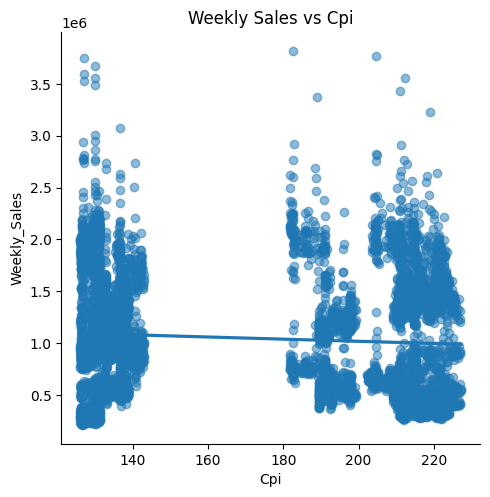

In [38]:
sns.lmplot(x='Cpi', y='Weekly_Sales', data=data, scatter_kws={'alpha':0.5})
plt.title('Weekly Sales vs Cpi')
plt.show()

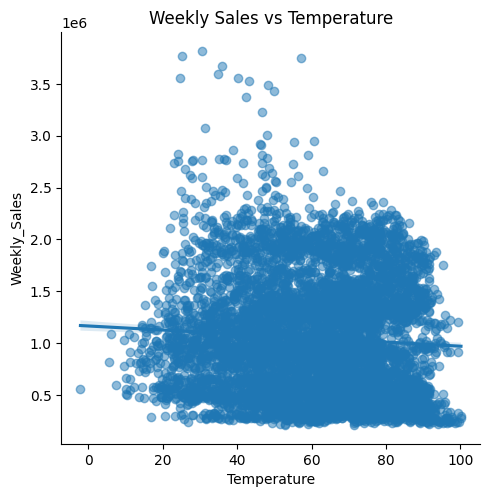

In [39]:
sns.lmplot(x='Temperature', y='Weekly_Sales', data=data, scatter_kws={'alpha':0.5})
plt.title('Weekly Sales vs Temperature')
plt.show()

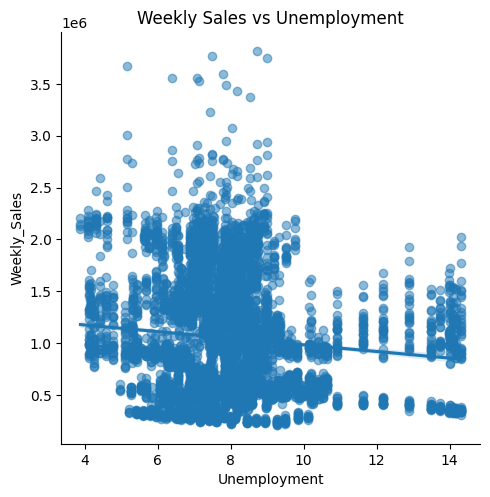

In [40]:
sns.lmplot(x='Unemployment', y='Weekly_Sales', data=data, scatter_kws={'alpha':0.5})
plt.title('Weekly Sales vs Unemployment')
plt.show()

### MACHINE LEARNING(Regression)

In this project, the machine learning model was used to identify and quantify the key factors influencing Walmart’s weekly sales.
Rather than producing direct forecasts, the model’s main goal was to analyze feature importance, highlighting how variables such as holidays, economic indicators (CPI, Unemployment), and operational factors (Fuel_Price, Temperature) impact sales.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

# Define features and target
features = ['Temperature', 'Fuel_Price', 'Cpi', 'Unemployment', 'Holiday_Flag', 'Month']
X = data[features]
y = data['Weekly_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)


# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Random Forest Regression Results:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")

Random Forest Regression Results:
R² Score: 0.103
MAE: $386,222.04
RMSE: $537,538.94


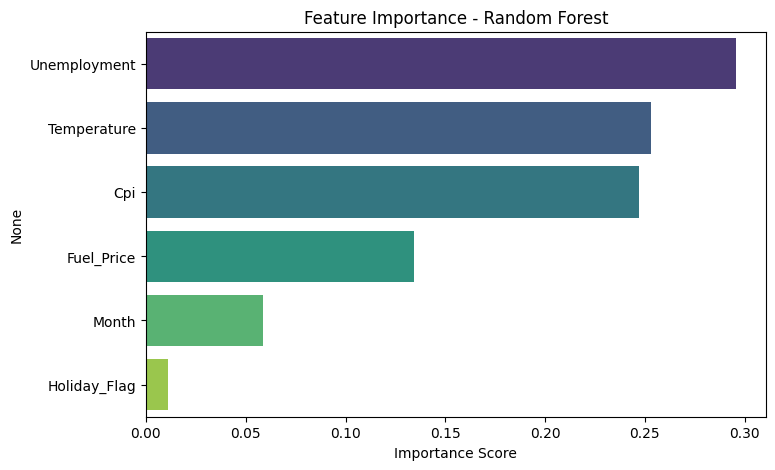

In [43]:
import matplotlib.pyplot as plt

importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.show()

### TIME-SERIES FORECASTING (Predicting Weekly Future Sales)

Forecast future weekly sales to help Walmart plan inventory, staffing, and promotion timing more effectively.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure Date index is datetime
data.index = pd.to_datetime(data.index)

# Aggregate weekly total sales across all stores
weekly_sales = data['Weekly_Sales'].resample('W').sum()

# Train-test split (last 10% as test)
split_point = int(len(weekly_sales) * 0.9)
train, test = weekly_sales.iloc[:split_point], weekly_sales.iloc[split_point:]


In [49]:
# ARIMA model (non-seasonal)
arima_model = ARIMA(train, order=(1,1,1))  # adjust p,d,q as needed
arima_results = arima_model.fit()

# Forecast
arima_forecast = arima_results.forecast(steps=len(test))

# Evaluate
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f"ARIMA MAE: {arima_mae:,.2f}, RMSE: {arima_rmse:,.2f}")


ARIMA MAE: 1,410,805.73, RMSE: 1,940,595.66


In [50]:
# SARIMA model (seasonal)
# Assume weekly seasonality ~52 weeks
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,52))
sarima_results = sarima_model.fit(disp=False)

# Forecast
sarima_forecast = sarima_results.get_forecast(steps=len(test))
sarima_pred_mean = sarima_forecast.predicted_mean

# Evaluate
sarima_mae = mean_absolute_error(test, sarima_pred_mean)
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_pred_mean))
print(f"SARIMA MAE: {sarima_mae:,.2f}, RMSE: {sarima_rmse:,.2f}")



SARIMA MAE: 632,939.44, RMSE: 734,077.21


##### comparison of models

In [60]:
# --- Model Comparison DataFrame ---
comparison = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'SARIMAX'],
    'MAE': [arima_mae, sarima_mae, sarimax_mae],
    'RMSE': [arima_rmse, sarima_rmse, sarimax_rmse]
})

# --- Identify Best Model ---
best_rmse_idx = comparison['RMSE'].idxmin()
best_mae_idx = comparison['MAE'].idxmin()

best_rmse_model = comparison.loc[best_rmse_idx, 'Model']
best_rmse_value = comparison.loc[best_rmse_idx, 'RMSE']

best_mae_model = comparison.loc[best_mae_idx, 'Model']
best_mae_value = comparison.loc[best_mae_idx, 'MAE']

# --- Print Summary ---
print("Model Performance Summary:")
print(comparison.round(3))
print("\n--------------------------------------")
print(f"Best Model (Lowest RMSE): {best_rmse_model} — RMSE = {best_rmse_value:,.2f}")
print(f"Best Model (Lowest MAE):  {best_mae_model} — MAE  = {best_mae_value:,.2f}")

if best_rmse_model == best_mae_model:
    print(f"\nOverall Best Model: {best_rmse_model} — performs best on both MAE and RMSE.")
else:
    print(f"\nℹNote: {best_rmse_model} has lower RMSE, while {best_mae_model} performs better on MAE.")


Model Performance Summary:
     Model          MAE         RMSE
0    ARIMA  1410805.735  1940595.657
1   SARIMA   632939.443   734077.212
2  SARIMAX  1038578.822  1355921.211

--------------------------------------
Best Model (Lowest RMSE): SARIMA — RMSE = 734,077.21
Best Model (Lowest MAE):  SARIMA — MAE  = 632,939.44

Overall Best Model: SARIMA — performs best on both MAE and RMSE.


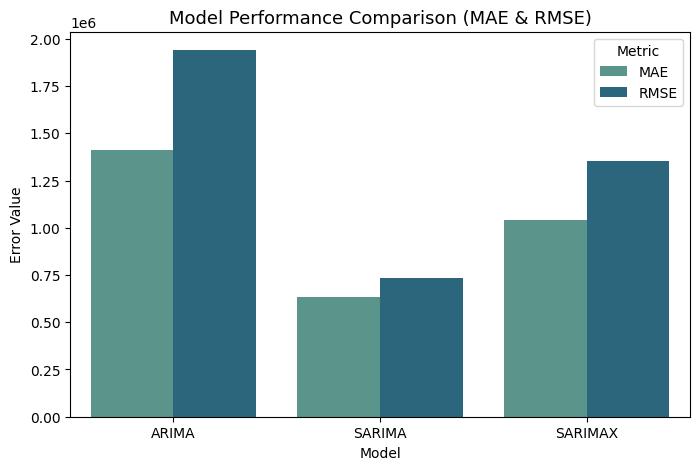

In [ ]:

comparison = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'SARIMAX'],
    'MAE': [arima_mae, sarima_mae, sarimax_mae],
    'RMSE': [arima_rmse, sarima_rmse, sarimax_rmse]
})

# Melt the DataFrame for visualization
comparison_melted = comparison.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Plot side-by-side comparison
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Value', hue='Metric', data=comparison_melted, palette='crest')
plt.title('Model Performance Comparison (MAE & RMSE)', fontsize=13)
plt.ylabel('Error Value')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.show()




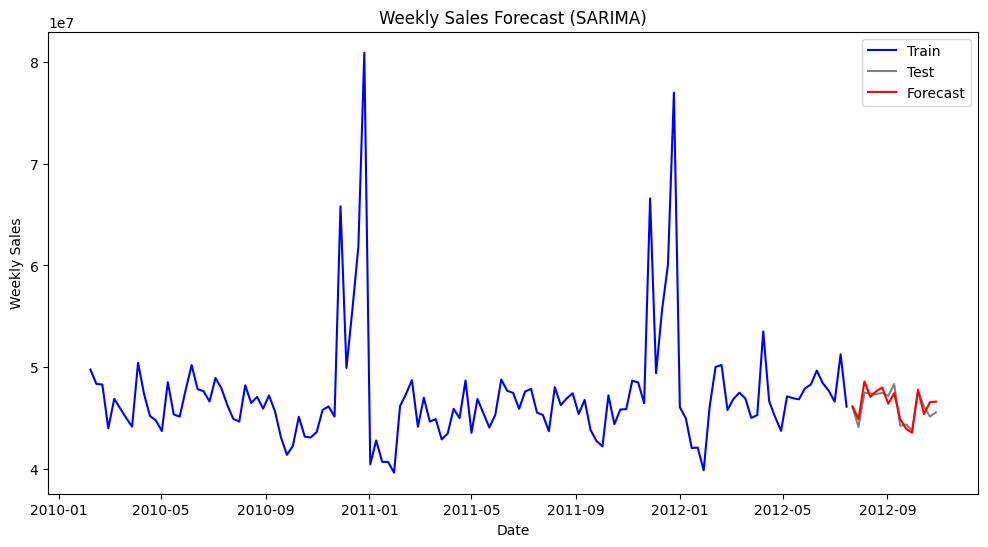

In [61]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='gray')

if best_model_name == 'ARIMA':
    plt.plot(test.index, arima_forecast, label='Forecast', color='red')
else:
    plt.plot(test.index, sarima_pred_mean, label='Forecast', color='red')

plt.title(f'Weekly Sales Forecast ({best_model_name})')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


SARIMAX Model with Exogenous variables (Temperature, CPI, Fuel, Unemployment).

In [62]:

# Ensure Date index is datetime
data.index = pd.to_datetime(data.index)

# Aggregate weekly sales across all stores (if multiple rows per week)
weekly_sales = data['Weekly_Sales'].resample('W').sum()

# Prepare exogenous variables (weekly aggregates)
exog_vars = ['Temperature', 'Fuel_Price', 'Cpi', 'Unemployment', 'Holiday_Flag']
exog = data[exog_vars].resample('W').mean()  # average values per week

# Train-test split (last 10% for testing)
split_point = int(len(weekly_sales) * 0.9)
train, test = weekly_sales.iloc[:split_point], weekly_sales.iloc[split_point:]
exog_train, exog_test = exog.iloc[:split_point], exog.iloc[split_point:]


In [56]:
# SARIMAX with seasonal order and exogenous variables
# Seasonal order: (p,d,q,s), s=52 for weekly seasonality
sarimax_model = SARIMAX(train, 
                        order=(1,1,1), 
                        seasonal_order=(1,1,1,52), 
                        exog=exog_train)
sarimax_results = sarimax_model.fit(disp=False)

# Forecast
forecast = sarimax_results.get_forecast(steps=len(test), exog=exog_test)
pred_mean = forecast.predicted_mean
pred_ci = forecast.conf_int()

# Evaluate model
sarimax_mae = mean_absolute_error(test, pred_mean)
sarimax_rmse = np.sqrt(mean_squared_error(test, pred_mean))

print(f"SARIMAX MAE: {sarimax_mae:,.2f}")
print(f"SARIMAX RMSE: {sarimax_rmse:,.2f}")




SARIMAX MAE: 1,038,578.82
SARIMAX RMSE: 1,355,921.21


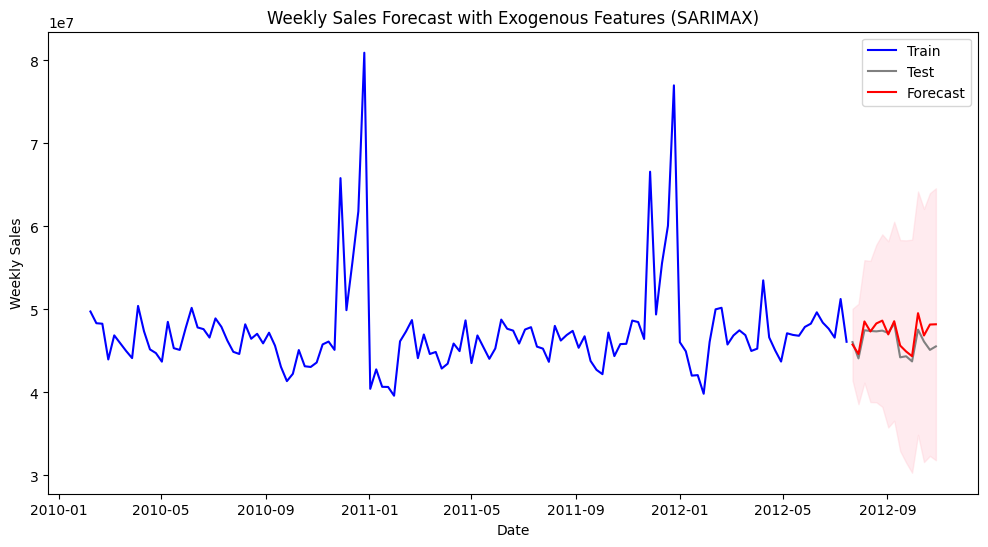

In [57]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='gray')
plt.plot(pred_mean.index, pred_mean, label='Forecast', color='red')
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title('Weekly Sales Forecast with Exogenous Features (SARIMAX)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()



### TOOLS & TECHNIQUES

| Category | Tools / Libraries |
| :--- | :--- |
| Programming |	Python (Pandas, NumPy) |
| Visualization | Matplotlib, Seaborn |
 |Forecasting |	Statsmodels (SARIMA, ARIMA) |
 |Machine Learning |	Scikit-learn (RandomForestRegressor) |
 |Data Cleaning | Pandas |
| Documentation	| Jupyter Notebook/ VS Code |